In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

sns.set_style('whitegrid')

In [28]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [30]:
df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [31]:
df.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


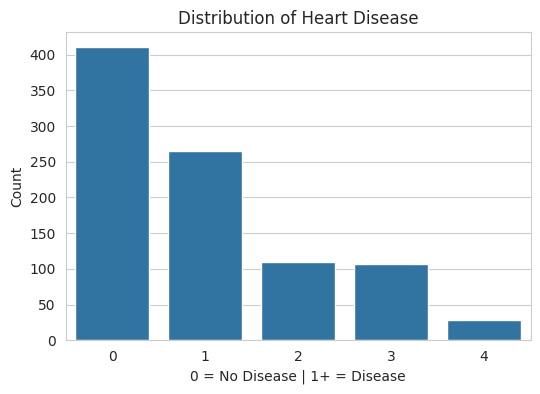

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title("Distribution of Heart Disease")
plt.xlabel("0 = No Disease | 1+ = Disease")
plt.ylabel("Count")
plt.show()



###Age vs Heart Disease

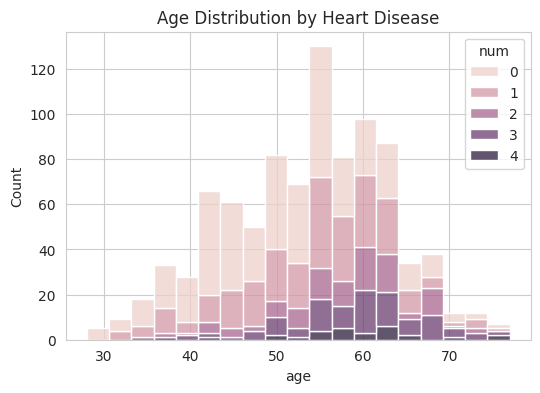

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='num', multiple='stack')
plt.title("Age Distribution by Heart Disease")
plt.show()


###Maximum Heart Rate vs Target

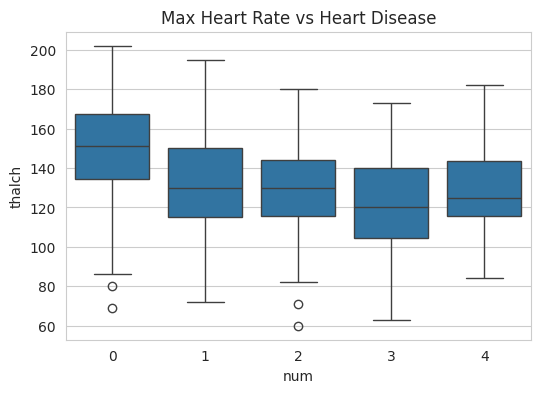

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x='num', y='thalch', data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

###Chest Pain Type vs Target

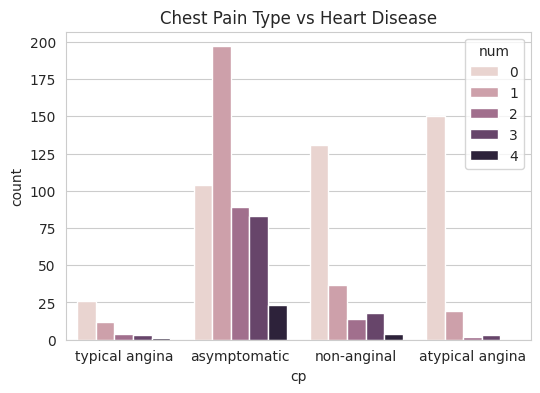

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='num', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()


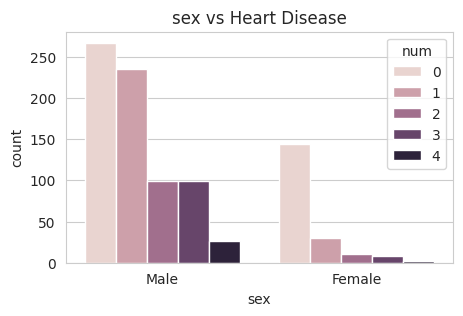

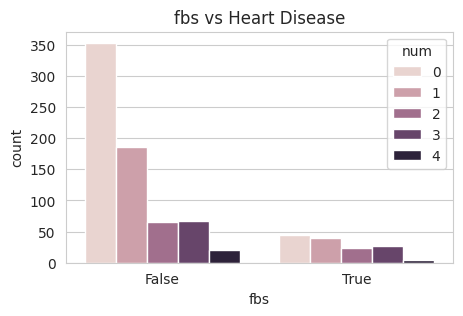

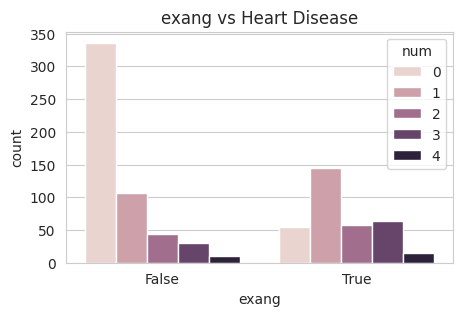

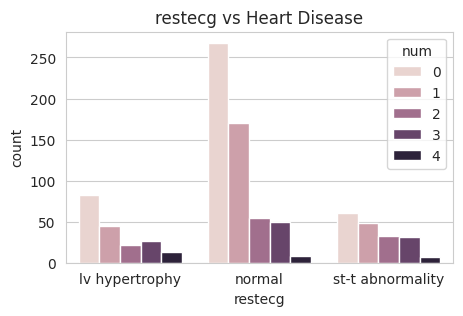

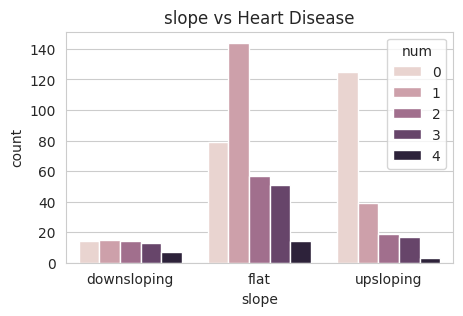

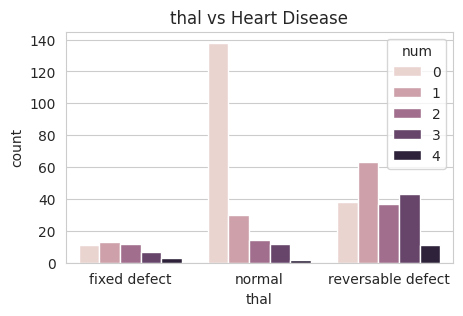

In [36]:
cat_cols = ['sex', 'fbs', 'exang', 'restecg', 'slope', 'thal']

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f"{col} vs Heart Disease")
    plt.show()


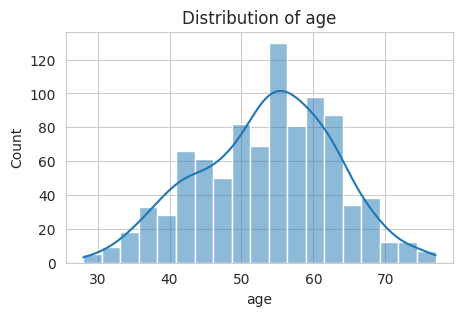

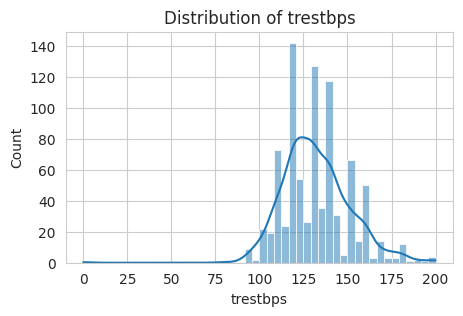

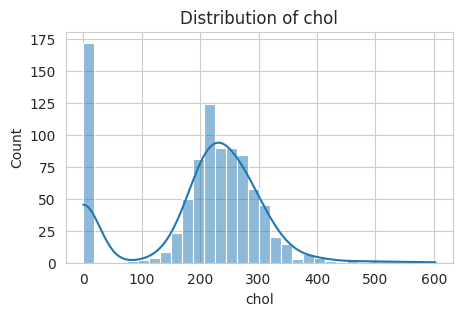

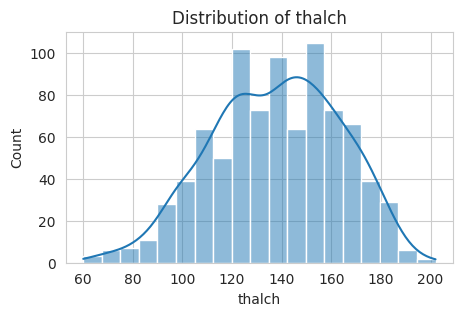

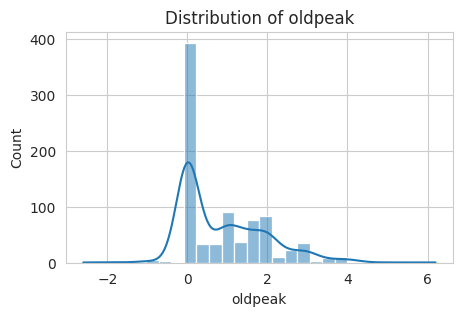

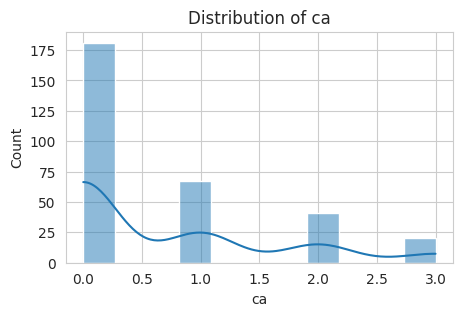

In [37]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


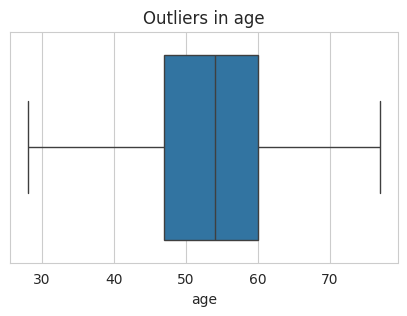

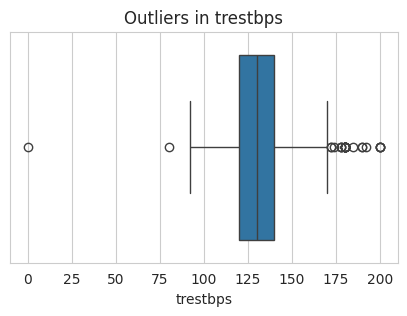

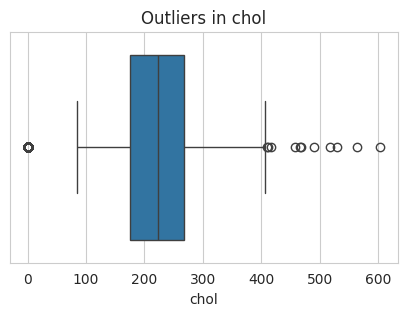

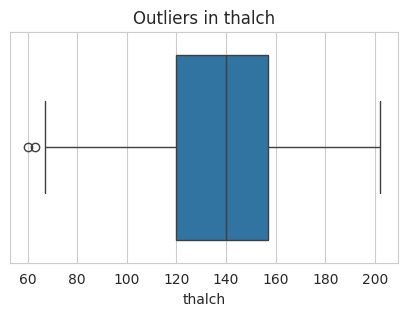

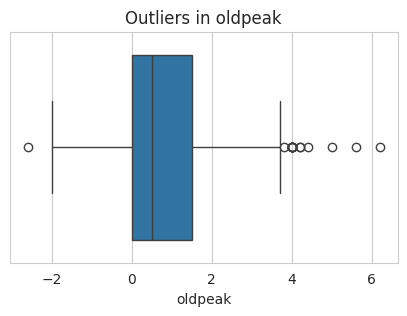

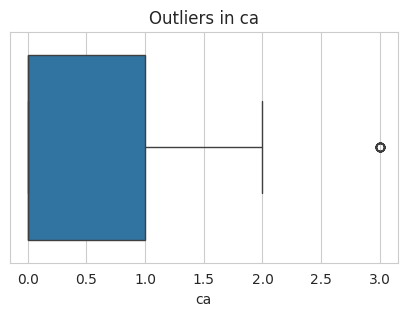

In [38]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


##  Overall EDA Summary

- Heart disease is influenced by a **combination of factors** such as **age**, **exercise capacity (max heart rate)**, **chest pain type**, and **resting blood pressure**.

- No single feature is sufficient to accurately predict heart disease; effective prediction requires **multivariate analysis** using multiple medical attributes together.

- The dataset is **well-suited for supervised classification**, provided that proper preprocessing steps such as handling missing values and encoding categorical variables are applied.

- Insights gained from exploratory data analysis directly inform **preprocessing decisions** (encoding and scaling) as well as **model selection**, improving overall model performance and reliability.


## Model building

In [39]:
X = df.drop(['num', 'id', 'dataset'], axis=1)
y = df['num']


In [40]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(exclude='number').columns

X[num_cols] = X[num_cols].fillna(X[num_cols].mean())
X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])


/tmp/ipython-input-1220264774.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])


In [41]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.46      0.57      0.51        53
           2       0.30      0.14      0.19        22
           3       0.23      0.24      0.23        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.36      0.36      0.35       184
weighted avg       0.55      0.58      0.56       184



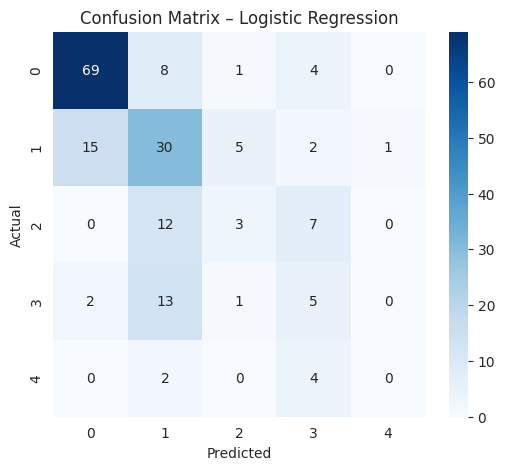

In [46]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()
